In [ ]:
!conda config --add channels conda-forge
!conda config --set channel_priority strict

In [ ]:
!conda install airflow

In [1]:
#packages

import os
from pathlib import Path

import csv
import pandas as pd
import datetime as DT #to get age value
import matplotlib.pyplot as plt
import numpy as np

from scipy import stats

#regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

PATH = str(Path(os.getcwd()).parent)


In [3]:
#read in data
#neighorhoods
data1 = pd.read_csv(PATH+"/Data/Neighborhood_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv")


In [4]:
data1.head()

RegionID  SizeRank         RegionName    RegionType StateName State  \
0    274772         0   Northeast Dallas  Neighborhood        TX    TX   
1    112345         1           Maryvale  Neighborhood        AZ    AZ   
2    192689         2           Paradise  Neighborhood        NV    NV   
3    270958         3    Upper West Side  Neighborhood        NY    NY   
4    118208         4  South Los Angeles  Neighborhood        CA    CA   

          City                           Metro          CountyName  \
0       Dallas     Dallas-Fort Worth-Arlington       Dallas County   
1      Phoenix         Phoenix-Mesa-Scottsdale     Maricopa County   
2    Las Vegas    Las Vegas-Henderson-Paradise        Clark County   
3     New York     New York-Newark-Jersey City     New York County   
4  Los Angeles  Los Angeles-Long Beach-Anaheim  Los Angeles County   

   1996-01-31  ...  2019-12-31  2020-01-31  2020-02-29  2020-03-31  \
0    133957.0  ...    329919.0    329699.0    329320.0    329442.0   
1         NaN  ...    190873.0    192848.0    194789.0    197094.0   
2    135858.0  ...    260933.0    261867.0    262567.0    264458.0   
3    226951.0  ...   1121653.0   1121390.0   1116455.0   1106338.0   
4    133922.0  ...    518675.0    522589.0    527759.0    533182.0   

   2020-04-30  2020-05-31  2020-06-30  2020-07-31  2020-08-31  2020-09-30  
0    330733.0    332540.0    334662.0    336913.0    338800.0    341125.0  
1    199738.0    202351.0    204756.0    207493.0    210739.0    214674.0  
2    266139.0    267250.0    267744.0    269076.0    271727.0    275313.0  
3   1106268.0   1105694.0   1105580.0   1111979.0   1118736.0   1126443.0  
4    537938.0    540725.0    544009.0    549893.0    558240.0    567059.0  

[5 rows x 306 columns]

In [5]:
data1.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'City', 'Metro', 'CountyName', '1996-01-31',
       ...
       '2019-12-31', '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
       '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31', '2020-09-30'],
      dtype='object', length=306)

In [7]:
plt.plot(data1.iloc[0,9:])
plt.show()

In [11]:
zhvi_zipcodes = pd.read_csv(PATH+"/Data/Zip_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv")

In [12]:
print(zhvi_zipcodes.head())
print(zhvi_zipcodes.columns)

   RegionID  SizeRank  RegionName RegionType StateName State      City  \
0     61639         0       10025        Zip        NY    NY  New York   
1     84654         1       60657        Zip        IL    IL   Chicago   
2     61637         2       10023        Zip        NY    NY  New York   
3     91982         3       77494        Zip        TX    TX      Katy   
4     84616         4       60614        Zip        IL    IL   Chicago   

                              Metro       CountyName  1996-01-31  ...  \
0       New York-Newark-Jersey City  New York County    223469.0  ...   
1          Chicago-Naperville-Elgin      Cook County    205864.0  ...   
2       New York-Newark-Jersey City  New York County    227596.0  ...   
3  Houston-The Woodlands-Sugar Land    Harris County    202808.0  ...   
4          Chicago-Naperville-Elgin      Cook County    276752.0  ...   

   2020-01-31  2020-02-29  2020-03-31  2020-04-30  2020-05-31  2020-06-30  \
0   1152491.0   1129471.0   1101051.0  

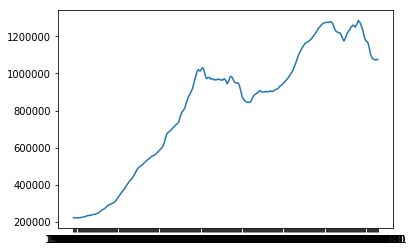

In [13]:
plt.plot(zhvi_zipcodes.iloc[0,9:])
plt.show()

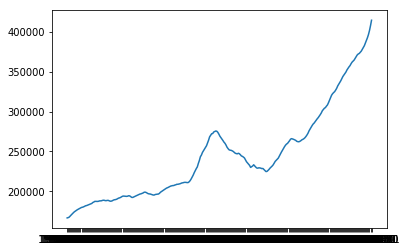

In [19]:
#plot based on zipcode of interest
zipcode = 84075
row = zhvi_zipcodes.loc[zhvi_zipcodes['RegionName']==zipcode].index[0]
plt.plot(zhvi_zipcodes.iloc[row,9:])
plt.show()

In [14]:
zhvi_zipcodes.head()

RegionID  SizeRank  RegionName RegionType StateName State      City  \
0     61639         0       10025        Zip        NY    NY  New York   
1     84654         1       60657        Zip        IL    IL   Chicago   
2     61637         2       10023        Zip        NY    NY  New York   
3     91982         3       77494        Zip        TX    TX      Katy   
4     84616         4       60614        Zip        IL    IL   Chicago   

                              Metro       CountyName  1996-01-31  ...  \
0       New York-Newark-Jersey City  New York County    223469.0  ...   
1          Chicago-Naperville-Elgin      Cook County    205864.0  ...   
2       New York-Newark-Jersey City  New York County    227596.0  ...   
3  Houston-The Woodlands-Sugar Land    Harris County    202808.0  ...   
4          Chicago-Naperville-Elgin      Cook County    276752.0  ...   

   2020-01-31  2020-02-29  2020-03-31  2020-04-30  2020-05-31  2020-06-30  \
0   1152491.0   1129471.0   1101051.0   1088618.0   1078931.0   1075287.0   
1    476938.0    478070.0    479687.0    480848.0    481240.0    481907.0   
2   1105727.0   1118319.0   1118234.0   1126375.0   1129930.0   1132927.0   
3    339589.0    339794.0    340299.0    341466.0    342543.0    343323.0   
4    619001.0    619244.0    619927.0    619687.0    619649.0    619916.0   

   2020-07-31  2020-08-31  2020-09-30  2020-10-31  
0   1072738.0   1072625.0   1075648.0   1073416.0  
1    483484.0    485902.0    489188.0    492585.0  
2   1133142.0   1136998.0   1149940.0   1152889.0  
3    343861.0    344957.0    346034.0    347871.0  
4    621376.0    623279.0    626620.0    629989.0  

[5 rows x 307 columns]

In [37]:
#Read in daily temps file (in this case, just from the Acton CA station. Can request more as needed)
daily_temps1 = pd.read_csv(PATH+"/Data/NOAA_ActonCA_DailyTemps.csv")
daily_temps1.head()
#min,max,avg temperature per day

STATION                     NAME        DATE  TAVG  TMAX  TMIN
0  USR0000CACT  ACTON CALIFORNIA, CA US  1996-01-01    54    61    46
1  USR0000CACT  ACTON CALIFORNIA, CA US  1996-01-02    53    62    43
2  USR0000CACT  ACTON CALIFORNIA, CA US  1996-01-03    48    69    35
3  USR0000CACT  ACTON CALIFORNIA, CA US  1996-01-04    45    61    33
4  USR0000CACT  ACTON CALIFORNIA, CA US  1996-01-05    50    65    38

In [38]:
daily_temps1.dtypes

STATION    object
NAME       object
DATE       object
TAVG        int64
TMAX        int64
TMIN        int64
dtype: object

In [48]:
#converts date column into timestamp format
daily_temps1['DATE'] = pd.to_datetime(daily_temps1.DATE)
#confirm it worked
daily_temps1.iloc[0]['DATE'].month

1

In [57]:
daily_grouped.index[0]

Timestamp('1996-01-31 00:00:00', freq='M')

In [49]:
daily_grouped = daily_temps1.resample('M',on='DATE').mean()

In [50]:
daily_grouped.head()

TAVG       TMAX       TMIN
DATE                                       
1996-01-31  48.903226  63.967742  37.161290
1996-02-29  51.555556  63.851852  41.592593
1996-03-31  53.483871  68.064516  40.290323
1996-04-30  61.000000  78.100000  44.100000
1996-05-31  64.741935  82.387097  46.645161

In [69]:
daily_grouped2 = daily_grouped
daily_grouped2['YEAR-MONTH']=daily_grouped2.index
daily_grouped2 = daily_grouped2[['YEAR-MONTH','TAVG','TMAX','TMIN']]
daily_grouped2['YEAR-MONTH']=daily_grouped2['YEAR-MONTH'].dt.strftime('%Y-%m')
daily_grouped2 = daily_grouped2.set_index(['YEAR-MONTH'])
daily_grouped2.head()

TAVG       TMAX       TMIN
YEAR-MONTH                                 
1996-01     48.903226  63.967742  37.161290
1996-02     51.555556  63.851852  41.592593
1996-03     53.483871  68.064516  40.290323
1996-04     61.000000  78.100000  44.100000
1996-05     64.741935  82.387097  46.645161

### The result is daily_grouped which has the avg,max,min temperature for each month, indexed by YYYY-MM. The index is not a timestamp though, so should that be changed? 

In [ ]:
grindhouse_maids=gr





indhouse_visitors.maid.unique()
grindhouse_maids.shape

In [ ]:
type(grindhouse_maids)

In [ ]:
all_visitors['matched']=np.where(df.maid ==)

In [ ]:
grindhouse_POI = all_visitors[all_visitors['maid'].isin(grindhouse_maids)].copy()

In [ ]:
grindhouse_POI.shape

In [ ]:
grindhouse_POI.maid.nunique()

# ^ 2136 maids to work with, and our dataset is __

In [ ]:
maid_observation_counts = grindhouse_POI.maid.value_counts()
maid_observation_counts.to_csv('maid_observation_counts.csv')
maid_observation_counts.head()

In [ ]:
np.percentile(maid_observation_counts.values,75)

In [ ]:
stats.describe(maid_observation_counts.values)

In [ ]:
grindhouse_maids.shape

In [ ]:
all_visitors_maids = all_visitors.maid.unique()
all_visitors_maids.shape

In [ ]:
#all_visitors_maids = all_visitors.maid.unique().reshape((1,-1))
#grindhouse_maids.reshape((1,-1))
check1 = np.concatenate((grindhouse_maids,all_visitors_maids))

In [ ]:
np.unique(check1).size
#This should be equal to grindhouse_POI.maid.nunique() ---which is 2136

In [ ]:
grindhouse_POI[['cat1','cat2','cat3']] = grindhouse_POI.poi_categories.str.split(":",n=2,expand=True)

In [ ]:
cat1_counts = grindhouse_POI.cat1.value_counts()

In [ ]:
cat1_counts

In [ ]:
type(cat1_counts)

In [ ]:
cat1_counts.to_csv('cat1_counts.csv')

In [ ]:
plt.scatter(cat1_counts.values, cat1_counts.index, alpha=0.9)

plt.rcParams["figure.figsize"] = [10,20]
plt.gca().invert_yaxis()

plt.savefig('plot2.png',dpi=100)

In [ ]:
cat2items=grindhouse_POI[grindhouse_POI['cat1']=='restaurants']['cat2']

In [ ]:
cat2counts = cat2items.value_counts()
cat2counts.to_csv('cat2_counts.csv')

In [ ]:
plt.scatter(cat2counts.values, cat2counts.index, alpha=0.9)

plt.rcParams["figure.figsize"] = [10,20]
plt.gca().invert_yaxis()

plt.savefig('plot3.png',dpi=100)

In [ ]:
cat2items[33]